#**Data Visualization using Plotnine and ggplot**

#**Install Required Packages**

In [ ]:
pip install plotnine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
pip install mpg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 KB 10.8 MB/s eta 0:00:00
  Created wheel for mpg: filename=mpg-0.2.1-py3-none-any.whl size=7849 sha256=b135b7d1365e47e857eba34655ec4a7450421f758dfa82d83d03306e05f2dfac
  Stored in directory: /root/.cache/pip/wheels/d4/86/b3/095d80d0985bdd74b9c5c0e69f97966c86a2ca71bc3e5857bf
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=afc268ec2d122bea2f27019946927af21456455028a7a638b7d1084429a8729a
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
  Created wheel for pymer: filename=pymer-0.3.3-cp38-cp38-linux_x86_64.whl size=170817 sha256=a9b96eba2917

#**Import Modules**

In [37]:
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as pyplot
from matplotlib import font_manager as fmgr
from pandas.plotting import autocorrelation_plot
import plotnine
from plotnine import ggplot, geom_line, aes
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
from datetime import datetime,timedelta
%matplotlib inline

#**Line Plot**

In [ ]:
Year= [2001,2002,2003,2004,2005]
Earnings=[10000,11000,13000,14500,25000]
df= pd.DataFrame({'Year': Year,'Earnings':Earnings})

In [ ]:
df.head()

,Year,Earnings
0,2001,10000
1,2002,11000
2,2003,13000
3,2004,14500
4,2005,25000


In [ ]:
l_p= ggplot(data=df,mapping=aes(x="Year",y="Earnings"))

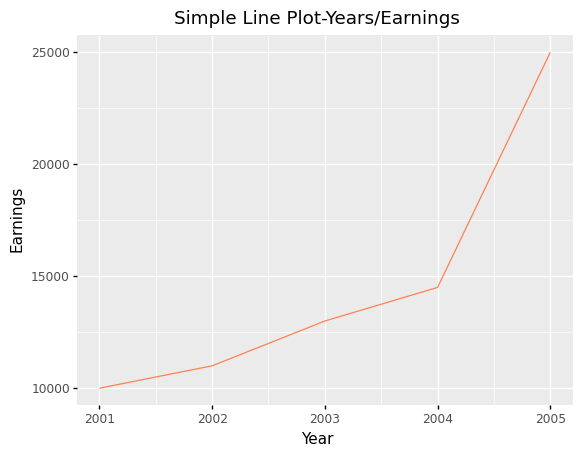

In [ ]:
(l_p+plotnine.geom_line(color="coral")+plotnine.labs(title="Simple Line Plot-Years/Earnings")).draw();

#**Multiline plot**

In [ ]:
Year= [2001,2002,2003,2004,2005]
SDE_income=[21000,22000,24000,36000,40000]
HR_income=[9000,15000,14500,30000,35000]
income_df=pd.DataFrame({"Year": Year,"SDE_income": SDE_income,"HR_income":HR_income})

In [ ]:
income_df.head()

,Year,SDE_income,HR_income
0,2001,21000,9000
1,2002,22000,15000
2,2003,24000,14500
3,2004,36000,30000
4,2005,40000,35000


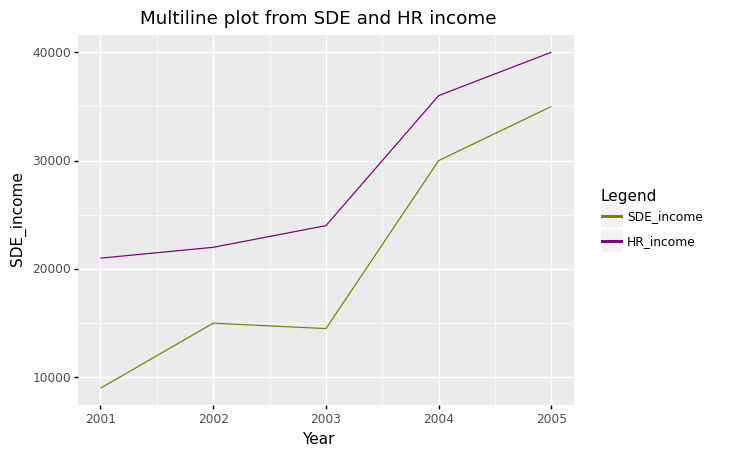

In [ ]:
(ggplot()+plotnine.geom_line(data=income_df,mapping=aes(x="Year", y="SDE_income",color="'purple'"))+plotnine.geom_line(data=income_df,mapping=aes(x="Year", y="HR_income",color="'olive'"))+plotnine.labs(title="Multiline plot from SDE and HR income")+plotnine.scale_color_identity(guide='legend', name="Legend", breaks=["olive","purple"],labels=['SDE_income','HR_income'])).draw();

# **Bar Plot**

In [ ]:
df=sns.load_dataset('titanic')

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


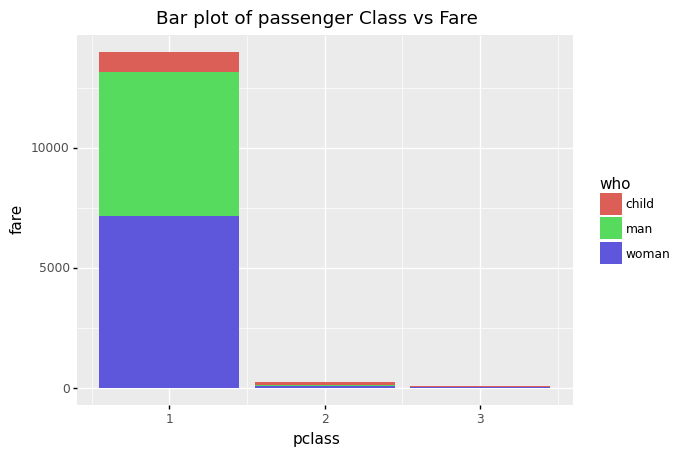

In [ ]:
(plotnine.ggplot(data=df.dropna(),mapping = aes(x='pclass',y='fare', fill="who"))+
plotnine.geom_col()+
plotnine.labs(title="Bar plot of passenger Class vs Fare")).draw();

#**Scatter Plot**

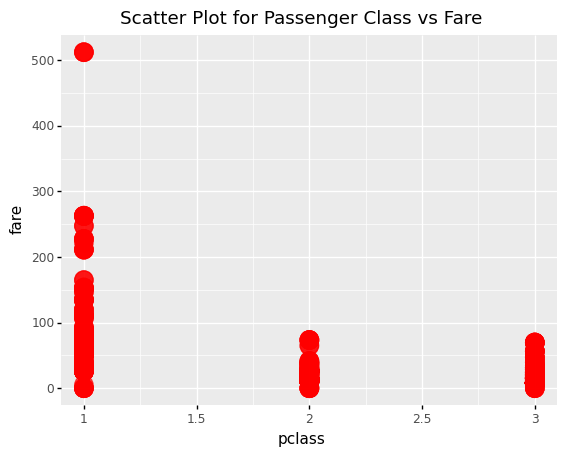

In [ ]:
scatter_plot=ggplot(data=df, mapping=aes(x='pclass',y='fare'))
(scatter_plot +
 plotnine.labs(title="Scatter Plot for Passenger Class vs Fare")+
plotnine.geom_point(shape='o',size=7,color="red",alpha=0.7)).draw();

#**Histogram**

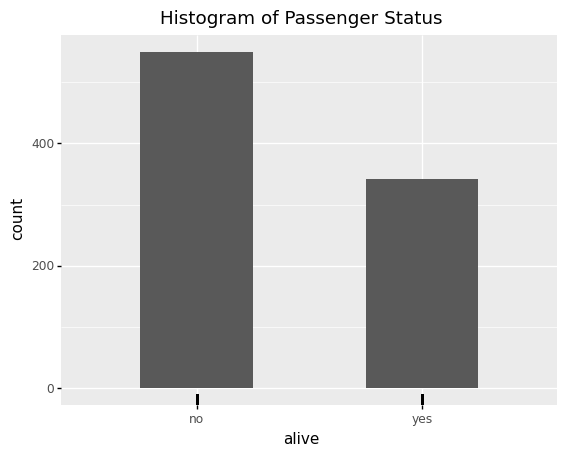

In [21]:
hist=ggplot(data=df,mapping=aes(x='alive'))
(hist+plotnine.labs(title="Histogram of Passenger Status")+
 plotnine.geom_histogram(binwidth=0.5)+
 plotnine.geom_rug()).draw();

#**Density plot**

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_density : Removed 177 rows containing non-finite values.


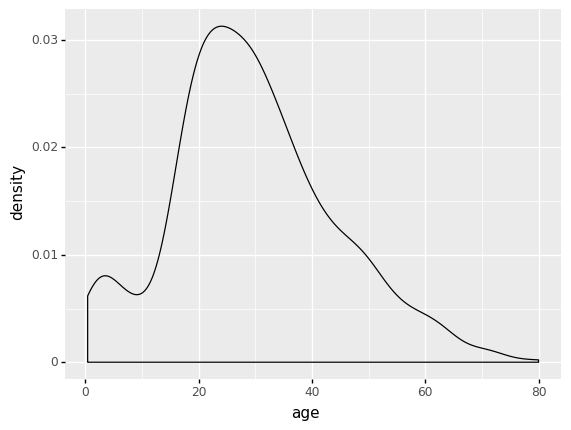

<ggplot: (8731102332977)>

In [41]:
(ggplot(df, aes(x='age'))
 + plotnine.geom_density(alpha=0.1)
)

#**Box Plot**

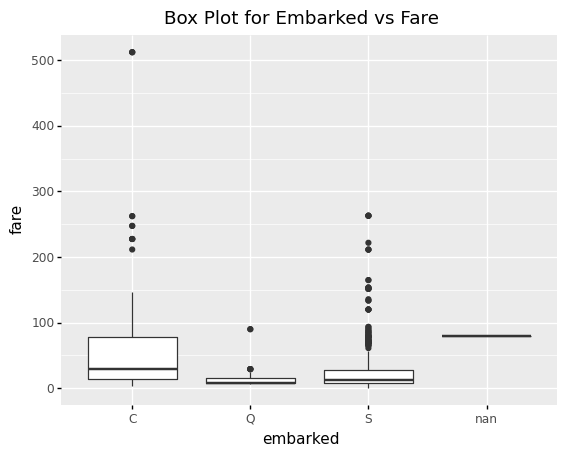

In [ ]:
bp=ggplot(data=df,mapping=aes(x="embarked", y="fare"))
(bp+ plotnine.geom_boxplot()+
 plotnine.labs(title="Box Plot for Embarked vs Fare")).draw();

#**Violin Plot**

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_ydensity : Removed 177 rows containing non-finite values.
/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_jitter : Removed 177 rows containing missing values.


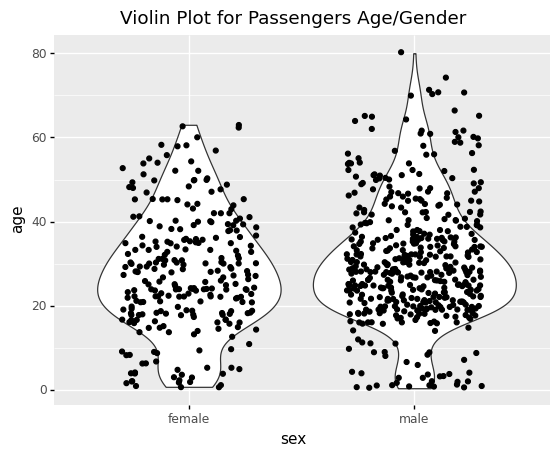

In [ ]:
vp=ggplot(data=df,mapping=aes(x="sex", y="age"))
(vp+
 plotnine.geom_violin()+
 plotnine.labs(title="Violin Plot for Passengers Age/Gender")+
 plotnine.geom_jitter(position=plotnine.position_jitter(0.3))).draw();